# **Histogramas con eventos completos**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Mounted at /content/drive


In [2]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/dados/'
PATH_FIGURE = '/histograms/'
FILE_DATOS_ESTACION = 'events_MM_nxny1426.csv'
FILE_RELIEVE = 'GMRTv3_8_20210316topo_LR.grd'

!mkdir -p drive/MyDrive/Seminario-3-master/histograms

In [3]:
df = pd.read_csv(PATH_DRIVE + PATH_DADOS + FILE_DATOS_ESTACION, 
                 sep = ';'
                )
df['date_min_t'] = pd.to_datetime(df['date_min_t'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')
df['date_max_dt'] = pd.to_datetime(df['date_max_dt'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')

In [4]:
df['hour_min_t'] = df['date_min_t'].dt.hour
df['month_min_t'] = df['date_min_t'].dt.month
df['hour_max_dt'] = df['date_max_dt'].dt.hour
df['month_max_dt'] = df['date_max_dt'].dt.month

### Histograma 1: Análisis por hora de la temperatura.

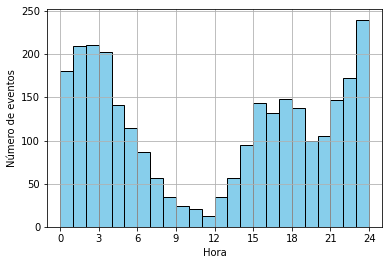

In [5]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['hour_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0, 25))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(-1, 25)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_xticks(range(0, 25, 3))
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_hora_Temp.png', format='png')

### Histograma 2: Análisis por mes de la temperatura.

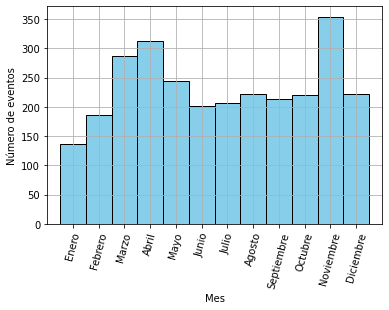

In [6]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['month_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['month_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_mes_Temp.png', format='png')

### Histograma 3: Análisis por hora de la disminución de temperatura.

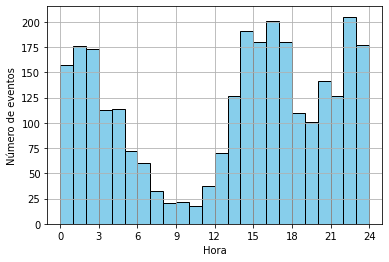

In [7]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['hour_max_dt'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0, 25))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_max_dt'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(-1, 25)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_ylabel("Número de eventos")
ax.set_xticks(range(0, 25, 3))
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_hora_dism.png', format='png')

### Histograma 4: Análisis por mes de la disminución de temperatura.

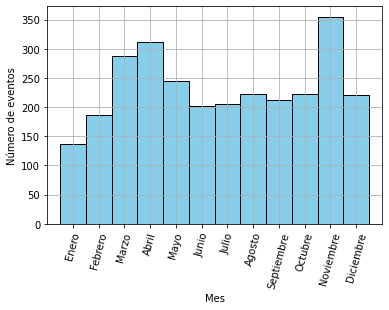

In [8]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['month_max_dt'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['month_max_dt'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(0, 13)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_mes_dism.png', format='png')

# **Histogramas en horario nocturno (20h hasta 06h)**




In [13]:
df_nocturno = df.loc[(df['hour_min_t'] >= 20) | (df['hour_min_t'] < 6)]

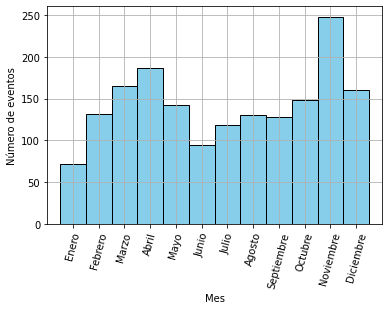

In [14]:
fig, ax = plt.subplots()

# Gráfico del histograma
df_nocturno['month_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_mes_Temp_nocturno.png', format='png')

In [17]:
df_nocturno

,date_min_t,lon_t,lat_t,min_t,date_max_dt,lon_dt,lat_dt,max_dt,hour_min_t,month_min_t,hour_max_dt,month_max_dt
2,2011-01-07 00:45:00-05:00,-74.121,7.201,216.0,2011-01-07 00:15:00-05:00,-73.979,7.344,-66.8,0,1,0,1
6,2011-01-08 01:45:00-05:00,-74.836,5.770,213.6,2011-01-07 21:15:00-05:00,-74.836,4.912,-54.4,1,1,21,1
9,2011-01-10 01:45:00-05:00,-73.979,7.201,221.5,2011-01-10 00:45:00-05:00,-73.979,7.201,-63.0,1,1,0,1
12,2011-01-15 00:15:00-05:00,-74.836,5.627,206.7,2011-01-14 22:45:00-05:00,-74.836,5.627,-75.9,0,1,22,1
14,2011-01-17 00:15:00-05:00,-73.693,7.487,209.9,2011-01-16 23:15:00-05:00,-73.693,7.487,-74.3,0,1,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2797,2017-12-28 23:45:00-05:00,-74.836,5.484,202.5,2017-12-28 23:45:00-05:00,-74.693,5.484,-72.2,23,12,23,12
2799,2017-12-30 02:45:00-05:00,-74.121,6.485,207.4,2017-12-30 01:45:00-05:00,-74.121,6.485,-71.2,2,12,1,12
2800,2017-12-30 05:45:00-05:00,-73.979,6.915,208.9,2017-12-30 03:45:00-05:00,-73.550,6.772,-60.4,5,12,3,12
2803,2017-12-31 01:15:00-05:00,-73.693,7.630,221.1,2017-12-31 00:15:00-05:00,-73.693,7.630,-59.6,1,12,0,12


# **Histogramas en horario diurno (06h hasta 20h)**



In [23]:
df_diurno = df.loc[(df['hour_min_t'] >= 6) & (df['hour_min_t'] < 20)]

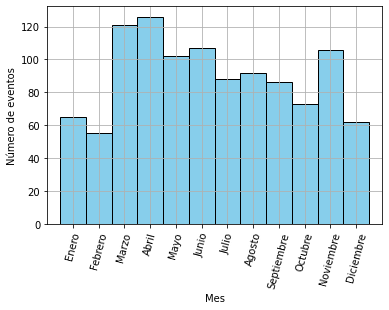

In [24]:
fig, ax = plt.subplots()

# Gráfico del histograma
df_diurno['month_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_DRIVE + PATH_FIGURE + 'Histograma_mes_Temp_diurno.png', format='png')

In [25]:
df_diurno

,date_min_t,lon_t,lat_t,min_t,date_max_dt,lon_dt,lat_dt,max_dt,hour_min_t,month_min_t,hour_max_dt,month_max_dt
0,2011-01-03 17:45:00-05:00,-73.693,6.915,211.9,2011-01-03 16:15:00-05:00,-73.836,6.915,-61.6,17,1,16,1
1,2011-01-04 18:15:00-05:00,-74.407,6.915,227.8,2011-01-04 17:15:00-05:00,-74.407,6.915,-64.1,18,1,17,1
3,2011-01-07 12:45:00-05:00,-74.836,5.055,229.9,2011-01-07 11:45:00-05:00,-74.836,5.055,-50.3,12,1,11,1
4,2011-01-07 16:15:00-05:00,-73.264,7.487,205.6,2011-01-07 16:45:00-05:00,-74.264,6.915,-76.6,16,1,16,1
5,2011-01-07 17:45:00-05:00,-74.264,7.058,211.8,2011-01-07 16:45:00-05:00,-74.264,7.058,-71.8,17,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2788,2017-12-07 17:15:00-05:00,-73.407,7.916,212.7,2017-12-07 15:15:00-05:00,-73.264,8.059,-72.4,17,12,15,12
2791,2017-12-09 18:45:00-05:00,-73.693,6.915,215.4,2017-12-09 17:45:00-05:00,-73.693,6.915,-78.8,18,12,17,12
2798,2017-12-29 08:15:00-05:00,-73.693,6.628,207.5,2017-12-29 03:45:00-05:00,-73.550,7.058,-51.3,8,12,3,12
2801,2017-12-30 15:45:00-05:00,-73.693,8.059,225.4,2017-12-30 14:15:00-05:00,-73.693,8.059,-62.5,15,12,14,12
